In [12]:
import sys
sys.path.append("..")

[autoreload of models.dalle.bart_encoder failed: Traceback (most recent call last):
  File "/fsx/users/binhtang/conda/envs/dallemini/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/fsx/users/binhtang/conda/envs/dallemini/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/fsx/users/binhtang/conda/envs/dallemini/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/fsx/users/binhtang/conda/envs/dallemini/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 329, in update_class
    if update_generic(old_obj, new_obj):
  File "/fsx/users/binhtang/conda/envs/dallemini/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/fsx/users/binhtang/conda/envs/dallemini/lib/python3.9/site-packa

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import torch
from IPython.display import display, update_display
from PIL import Image
from models.dalle.dalle import MinDalle

In [15]:
torch.manual_seed(0)
torch.set_grad_enabled(False)
torch.backends.cudnn.enabled = True
torch.backends.cudnn.allow_tf32 = True

model = MinDalle(root_dir='../pretrained', dtype=torch.float32)

OSError: [Errno 116] Stale file handle: '../pretrained/dalle_mega/config.json'

CPU times: user 14 s, sys: 41.2 ms, total: 14 s
Wall time: 14 s


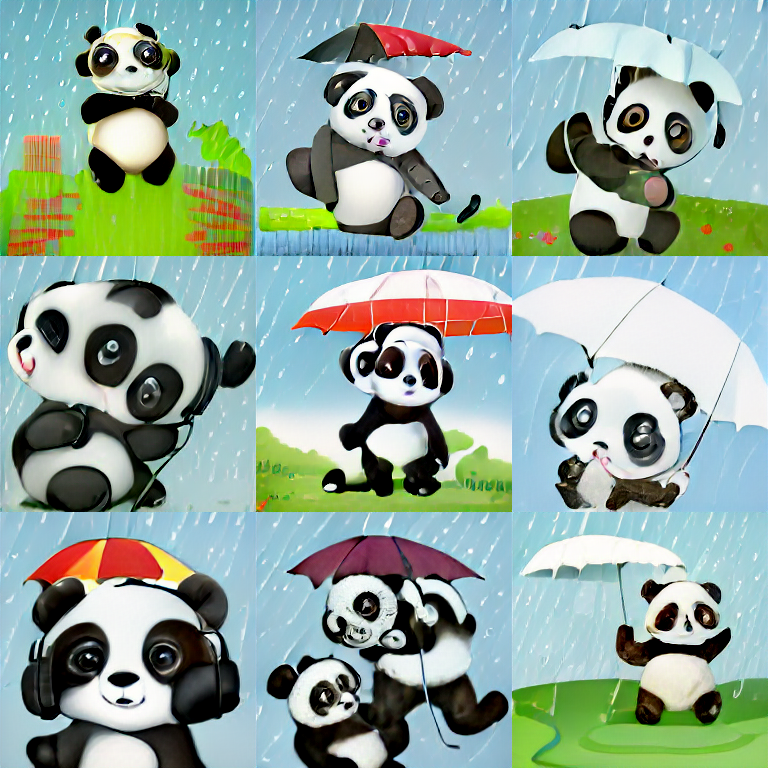

In [14]:
%%time

text = "an illustration of a baby panda with headphones holding an umbrella in the rain"
# text = "A dragon fruit wearing karate belt in the snow"
seamless = False
grid_size = 3
temperature = 1
supercondition_factor = 16
top_k = 128

image = model.generate_image(
    text=text,
    grid_size=grid_size,
    is_seamless=seamless,
    temperature=temperature,
    top_k=int(top_k),
    supercondition_factor=float(supercondition_factor)
)
Image.fromarray(image)

In [15]:
torch.manual_seed(0)
torch.set_grad_enabled(False)
torch.backends.cudnn.enabled = True
torch.backends.cudnn.allow_tf32 = True

model = MinDalle(root_dir='../pretrained', dtype=torch.float16, device='cuda')

CPU times: user 9.85 s, sys: 75.2 ms, total: 9.92 s
Wall time: 10 s


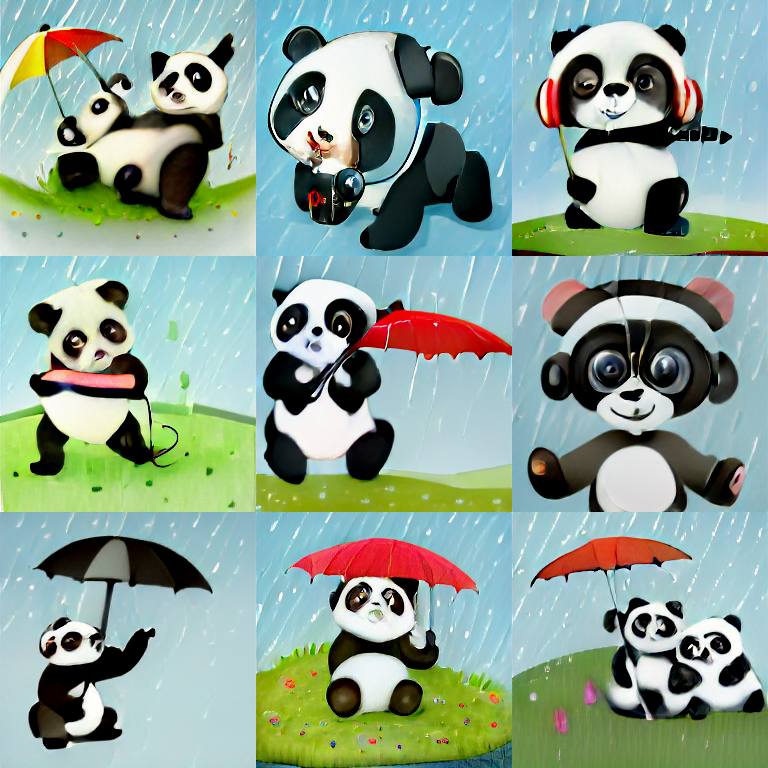

In [16]:
%%time

text = "an illustration of a baby panda with headphones holding an umbrella in the rain"
# text = "A dragon fruit wearing karate belt in the snow"
seamless = False
grid_size = 3
temperature = 1
supercondition_factor = 16
top_k = 128

image = model.generate_image(
    text=text,
    grid_size=grid_size,
    is_seamless=seamless,
    temperature=temperature,
    top_k=int(top_k),
    supercondition_factor=float(supercondition_factor)
)
Image.fromarray(image)

In [22]:
image2 = image.reshape(grid_size * 256, grid_size, 256, 3).transpose(1, 0, 2, 3).reshape(grid_size ** 2, 256, 256, 3)

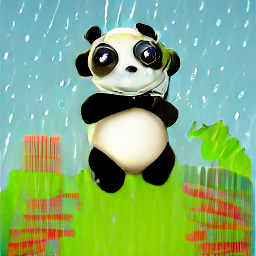

In [26]:
Image.fromarray(image2[0])

In [24]:
%%time

image_0 = next(image_stream)

CPU times: user 13.8 s, sys: 283 ms, total: 14.1 s
Wall time: 14.2 s


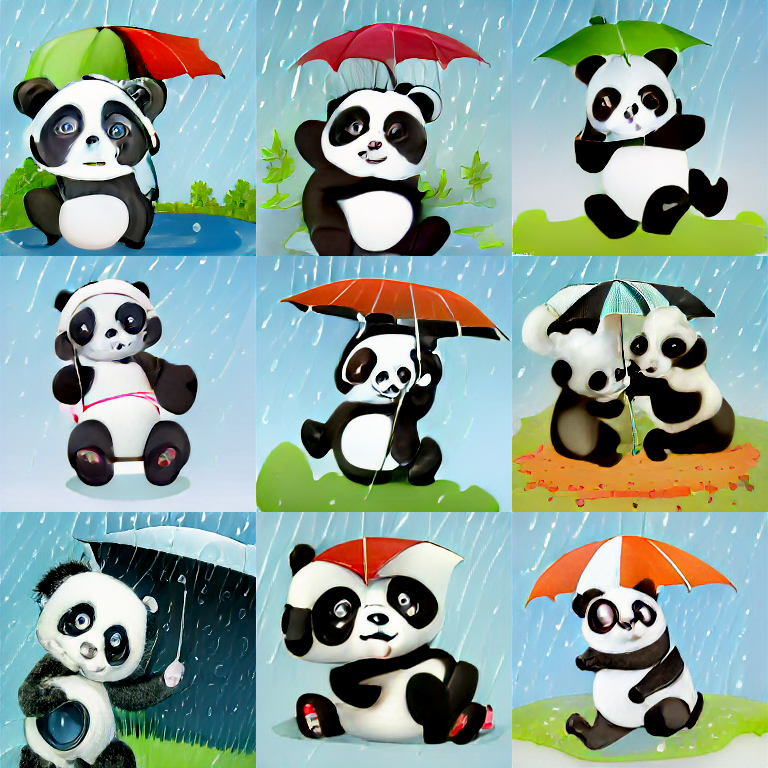

In [25]:
image_0

In [17]:
model

In [21]:
script = torch.jit.ScriptModule(model)

TypeError: __init__() takes 1 positional argument but 2 were given

In [22]:
torch.jit.script(model.eval())

AttributeError: 'MinDalle' object has no attribute 'eval'